In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as k

In [37]:
data=pd.read_csv('Datasets/Churn_Modelling.csv')

In [38]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
def checkOutliers(data, col):
    plt.figure(figsize=(12,4))   # bigger figure

    plt.subplot(1, 2, 1)
    plt.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout(pad=3)      # space from borders

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=col, kde=True)
    
    mean = data[col].mean()
    std = data[col].std()
    
    plt.axvline(mean + 3*std, color='red', linestyle='--')
    plt.axvline(mean - 3*std, color='red', linestyle='--')
    plt.title(f"Histogram of {col}")

    plt.tight_layout(pad=3)      # space between plots
    plt.show()


In [41]:
def handleOutliers(data,col):
    q3=data[col].quantile(0.75)
    q1=data[col].quantile(0.25)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    data.loc[data[col]>upper,col]=upper
    data.loc[data[col]<lower,col]=lower

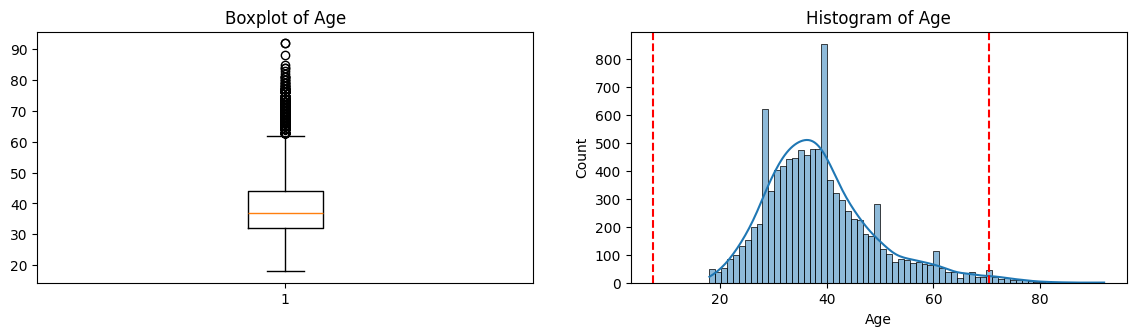

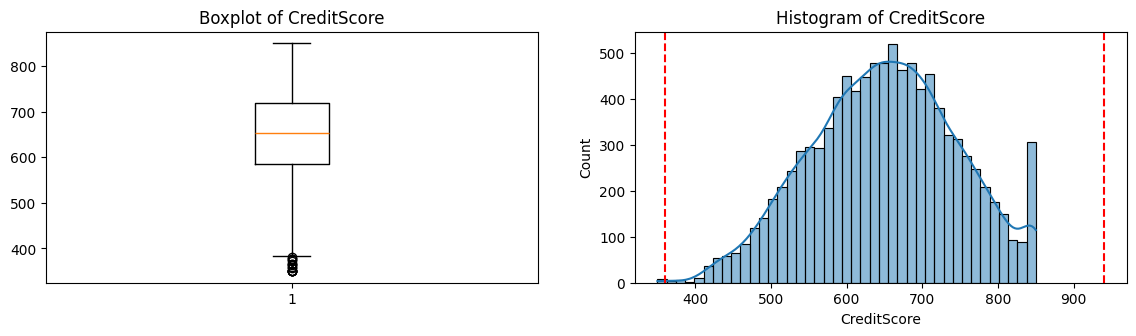

In [42]:
checkOutliers(data,'Age')
checkOutliers(data,'CreditScore')

In [43]:
handleOutliers(data,'Age')

In [44]:
handleOutliers(data,'CreditScore')

In [45]:
data.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [46]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [48]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [49]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [50]:
data['Geography']=data['Geography'].replace({'France':0, 'Spain':1, 'Germany':2})
data['Gender']=data['Gender'].replace({'Female':0, 'Male':1})

C:\Users\User\AppData\Local\Temp\ipykernel_12908\2360515052.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Geography']=data['Geography'].replace({'France':0, 'Spain':1, 'Germany':2})
C:\Users\User\AppData\Local\Temp\ipykernel_12908\2360515052.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender']=data['Gender'].replace({'Female':0, 'Male':1})


In [51]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [52]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [53]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [54]:
X.shape

(15926, 10)

In [55]:
y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [56]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [57]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=50)

In [59]:
model=k.models.Sequential()
model.add(k.layers.Dense(units=10,activation='relu'))
model.add(k.layers.Dense(units=32,activation='relu'))
model.add(k.layers.Dense(units=1,activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [61]:
model.fit(X_train,y_train,epochs=15,batch_size=50)

Epoch 1/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7306 - loss: 0.5414
Epoch 2/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7740 - loss: 0.4741
Epoch 3/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7783 - loss: 0.4598
Epoch 4/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7842 - loss: 0.4496
Epoch 5/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7912 - loss: 0.4407
Epoch 6/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7975 - loss: 0.4337
Epoch 7/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8030 - loss: 0.4272
Epoch 8/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.4194
Epoch 9/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8097 - loss: 0.4124
Epoch 10/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8140 - loss: 0.4054
Epoch 11/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8158 - loss: 0.4005
Epoch 12/15
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [62]:
model.evaluate(X_test,y_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8131 - loss: 0.4046


[0.40457895398139954, 0.8131017088890076]

In [63]:
test_pred=model.predict(X_test)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [65]:
test_pred

array([[0.63188237],
       [0.90355486],
       [0.03844557],
       ...,
       [0.25367978],
       [0.10335237],
       [0.09111919]], shape=(4778, 1), dtype=float32)

In [66]:
label=[]
for value in test_pred:
    if(value>=0.5):
        label.append(1)
    else:
        label.append(0)


In [67]:
# print(label)
# label
accuracy_score(y_test,label)

0.8131017161992465

In [70]:
# y_test.value_counts()